Dataset Shape: (95662, 16)

Data Types:
 TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
dtype: object

Sample Rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  Subscription

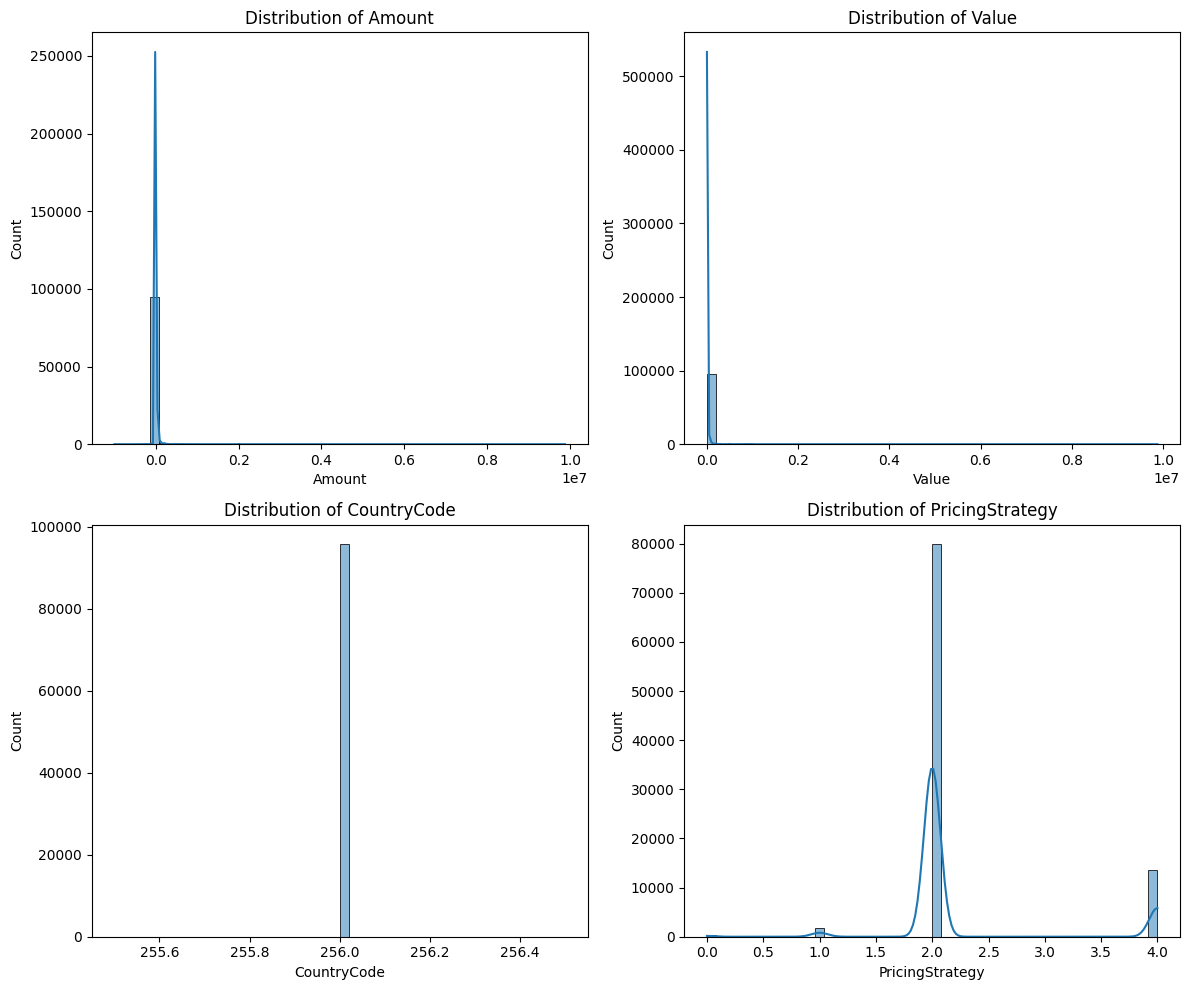


Top categories for ProductCategory:
 ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64

Top categories for CurrencyCode:
 CurrencyCode
UGX    95662
Name: count, dtype: int64

Top categories for ChannelId:
 ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


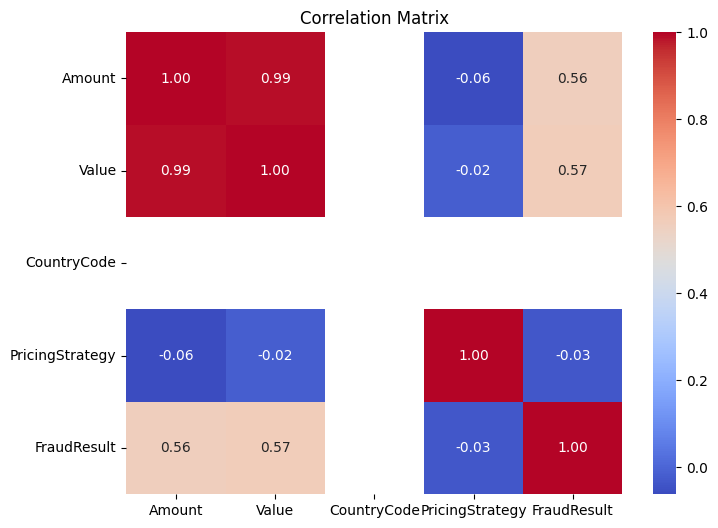


Missing Values:
 Series([], dtype: int64)


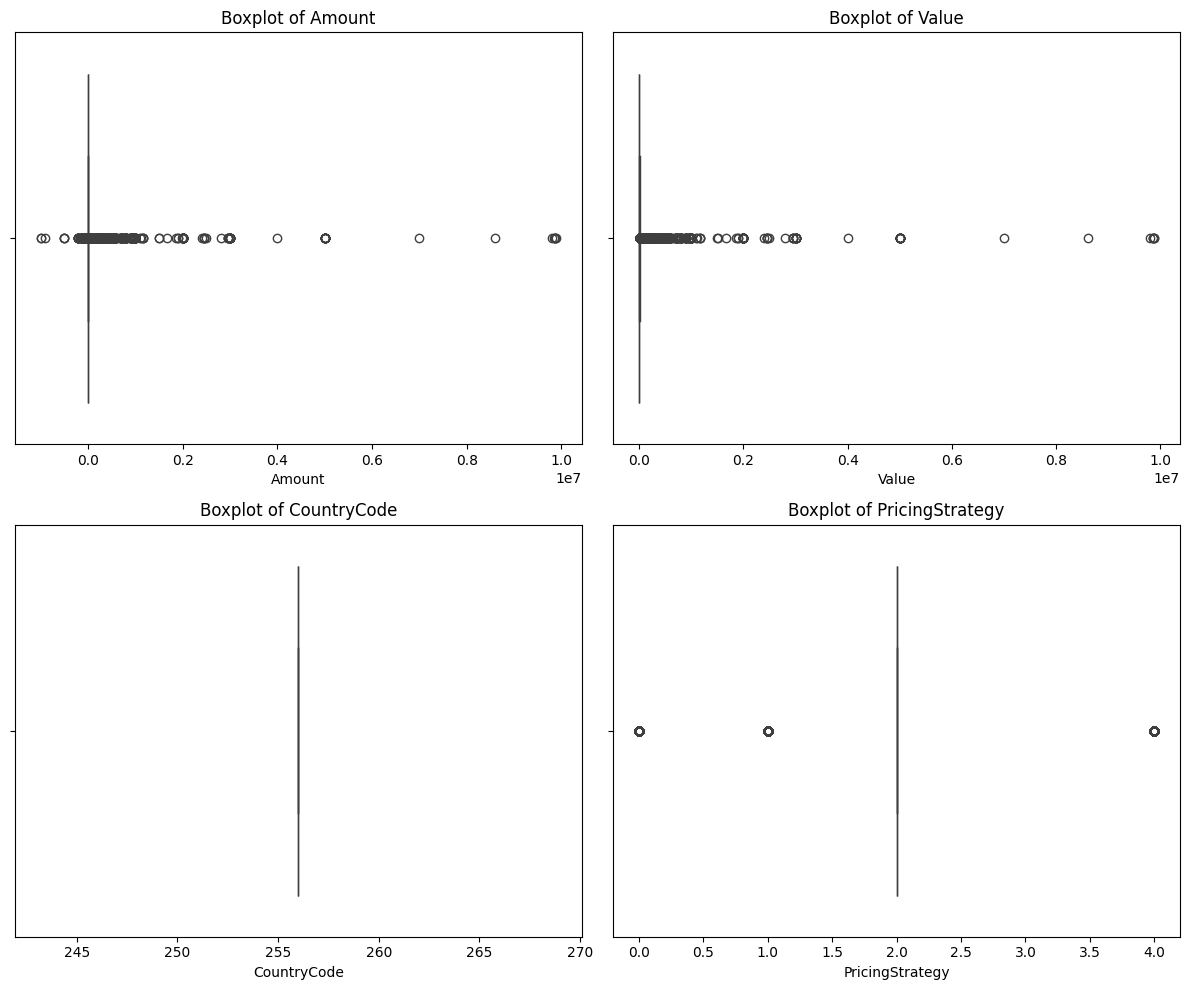


🔍 Key Insights:
- Fraud cases are very rare (FraudResult ≈ 0.2%).
- Amount and Value are highly correlated (r ≈ 0.99); one may be dropped.
- Negative values in 'Amount' could indicate reversals – treat carefully.
- 'CurrencyCode' and 'CountryCode' are constant – not useful for modeling.
- ProductCategory and ChannelId show promising variance for predictive modeling.


In [1]:
# EDA for Credit Scoring Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/data.csv")  # Adjust path as needed

# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# ----------------------
# 1. Dataset Overview
# ----------------------
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSample Rows:\n", df.head())

# ----------------------
# 2. Summary Statistics
# ----------------------
print("\nSummary Statistics (Numerical Features):")
print(df.describe())

# ----------------------
# 3. Distribution of Numerical Features
# ----------------------
numerical_cols = ['Amount', 'Value', 'CountryCode', 'PricingStrategy']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# ----------------------
# 4. Distribution of Categorical Features
# ----------------------
categorical_cols = ['ProductCategory', 'CurrencyCode', 'ChannelId']
for col in categorical_cols:
    print(f"\nTop categories for {col}:\n", df[col].value_counts().head(5))

# ----------------------
# 5. Correlation Matrix
# ----------------------
correlation = df[numerical_cols + ['FraudResult']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ----------------------
# 6. Missing Value Check
# ----------------------
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# ----------------------
# 7. Outlier Detection (Box Plots)
# ----------------------
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# ----------------------
# 8. Key Insights Summary
# ----------------------
print("\n🔍 Key Insights:")
print("- Fraud cases are very rare (FraudResult ≈ 0.2%).")
print("- Amount and Value are highly correlated (r ≈ 0.99); one may be dropped.")
print("- Negative values in 'Amount' could indicate reversals – treat carefully.")
print("- 'CurrencyCode' and 'CountryCode' are constant – not useful for modeling.")
print("- ProductCategory and ChannelId show promising variance for predictive modeling.")


🔍 1. Summary Statistics
Total Records: 95,662

Numerical Features: Amount, Value, CountryCode, PricingStrategy, FraudResult

Key Stats:

Amount & Value: Right-skewed with high outliers (max = ~9.8M)

FraudResult: Highly imbalanced (~0.2% positive class, likely "fraud" or "bad" outcome)

📊 2. Distribution of Numerical Features
Amount and Value are highly correlated (r ≈ 0.99) but contain outliers and negative values.

PricingStrategy: Mostly value 2, small distribution in 0–4

CountryCode: Only one value (256), so not useful for modeling

🧮 3. Categorical Feature Distributions (Top 3 classes)
ProductCategory:

financial_services: 45.4%

airtime: 45.0%

utility_bill: 2.0%

ChannelId:

ChannelId_3: 56k

ChannelId_2: 37k

ChannelId_5: 1k

CurrencyCode: Only UGX – no variability

🔗 4. Correlation Analysis
Feature Pair	Correlation
Amount ↔ Value	0.99
Amount ↔ FraudResult	0.56
Value ↔ FraudResult	0.57
PricingStrategy ↔ FraudResult	-0.03 (minimal)

💡 Amount and Value are strong predictors of fraud risk, but one may be dropped due to multicollinearity.

⚠️ 5. Missing Values
There are no missing values detected in any column.

🚨 6. Outlier Detection
Outliers in Amount and Value (e.g., values near ±1M to 9M)

Also negative amounts (may indicate reversals/refunds)

🔎 Top 3–5 Insights Summary
Fraud cases are rare (~0.2%), requiring special handling (e.g., resampling or anomaly detection).

Amount and Value are nearly identical – drop one or combine.

Outliers and negative values in Amount need domain-specific treatment (cap, transform, or flag).

CountryCode and CurrencyCode are constant and not predictive.

ProductCategory and ChannelId are important categorical predictors with enough variation for modeling.